# Python analysis of output from MATLAB CNMF-E implementation

This notebook is used for post-processing traces extracted using CNMFe from
dual-focal plane videos.

Specifically, the input to this notebook is the output of the import_raw_cosmos_data.py script.

Specify the dataset for analysis in trace_merge_params.py file (in the same directory as this file).

In [1]:
# import matplotlib
# matplotlib.use('TkAgg')
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext line_profiler
# %pdb

import os
from IPython.core.debugger import set_trace

from matplotlib import pyplot as plt
import scipy.sparse as sparse
import numpy as np
from skimage import measure
import time

# import cosmos.params.dataset_params as params ### All variables here should be capitalized.
import trace_merge_params as params ### All variables here should be capitalized.
import cosmos.traces.trace_analysis_utils as utils

import cosmos.behavior.bpod_io
from cosmos.imaging.cosmos_dataset import CosmosDataset

from bokeh.io import output_notebook
output_notebook()

/home/user/anaconda3/envs/cosmostools3_7/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading BokehJS ...

In [2]:
params.DATASETS

[{'date': '20180328', 'name': 'cux2ai148m943_for_testing_cosmostools3'}]

In [3]:
workstation = 'cosmosdata' #'analysis2'
if workstation == 'analysis2':
    base_path = '/home/izkula/Data/processedData/'
    fig_save_path = '/home/izkula/Dropbox/cosmos/trace_analysis/'
#     base_path = '/home/izkula/src/COSMOS/tests/test_cosmos_dataset/'
elif workstation == 'cosmosdata':
    base_path = '/hdd1/Data/processedData/'
    fig_save_path = '/home/user/Dropbox/cosmos/trace_analysis/'

# [3, 7, 15, 4, 5, 20, 19, 6, 0, 9, 10, 12, 13, 15, 16, 17, 18, 11] ## need to retry 4?
dataset = params.DATASETS[0]
#dataset = params.DATASETS[2] ##### this one looks promising but culling crashed
CD = CosmosDataset(base_path, dataset, fig_save_path)

Loading...
/hdd1/Data/processedData/20180328/cux2ai148m943_for_testing_cosmostools3/...top_out.mat
/hdd1/Data/processedData/20180328/cux2ai148m943_for_testing_cosmostools3/...bot_out.mat


In [4]:
do_load = False
do_manual = False
CD.cull(do_auto=not do_load, do_load=do_load, do_manual=do_manual, which_key='top_focus')
CD.cull(do_auto=not do_load, do_load=do_load, do_manual=do_manual, which_key='bot_focus')

Autoculling with corr_thresh=0.7
0.9240473934588495
0.9292776936676443
0.88956822916905
0.8853671177313904
0.8796020962993392
0.9132775287126327
0.9150961743875128
0.981675518813021
0.9674078598640922
0.9281622026410332
0.9231191627763925
0.9315895082480885
0.929697838470476
0.9309811093599664
0.9209466210358568
0.9212559723696286
0.9235181833145085
0.9350617805889184
0.9315061104283521
0.8499091330482492
0.8424430177546354
0.9010642970560884
0.9025401511694561
0.9476678219247686
0.9381261730441457
0.9183421444327318
0.9156551605129409
0.9478286133975841
0.9391923452296499
0.9066961837876211
0.8749858952298444
0.9715380511244772
0.9082539648861901
0.8896177840608551
0.9381874007318215
0.9150372846091418
0.9129333219054442
0.8993193088826277
0.9345310435757422
0.9315652520859284
0.8960517323030065
0.9235090851591012
0.9419844640036439
0.9341366679733767
0.9356307043983477
0.9033032713181567
0.9132265028433754
0.8804822039725966
0.9393409983232515
0.9431415765496737
0.9173311242374302
0.

Autoculling with corr_thresh=0.7
0.9840709462091604
0.9947742035214815
0.9984987884002218
0.9886170730677756
0.9930456898621206
0.9475451217012363
0.9907418100839721
0.8952988280890565
0.9314042248000274
0.8962934585051154
0.9751312680722829
0.9886211788391954
0.8885926205179078
0.9994087955677476
0.9887350214609794
0.9428905898289212
0.8917704583425666
0.9999656265650805
0.9514922894692501
0.9105355928313085
0.9031081994398446
0.8970737235968116
0.9454108819067356
0.891811996601199
0.9998396438866598
0.9999666527242335
0.9364151964905315
0.9168574202040245
0.938082127781627
0.8727097551959736
0.9838467348894079
0.9261198499747559
0.9552374967213807
0.9261815976604351
0.922537790158331
0.9997239335409067
0.9225629626602094
0.9416782681374913
0.8908346162920469
0.9119864103365318
0.9246460958109013
0.9384830107606924
0.9230559124005717
0.9998680598152946
0.8921536003802313
0.9110531067358317
0.9143603292373031
0.9173913998902047
0.9213682186673134
0.9105602536366915
0.9145371867067852
0

0.9089693932540126
0.691386678573925
0.8191110482831244
0.8941103880123977
0.8900887395482576
0.9113599887246023
0.9118922729075297
0.8297126255447422
0.8918782154908195
0.9751545555895329
0.6970388316603385
0.8348338001582152
0.8167986217874388
0.9032387638986619
0.8615005018841431
0.7451268758364803
0.8618795595410167
0.6424877630258354
0.6471819103490495
0.7759306220390637
0.8443028331876105
0.8475912410107441
0.9013201338878031
0.8115062836376356
0.8851904008041814
0.8292613520965224
0.7462211987720209
0.7774276596319354
0.8393979969574138
0.8908004085035361
0.8632517039422675
0.8055665423802236
0.7440941850209456
0.835664173399887
0.8447588352248162
0.8623527397543151
0.834701463651495
0.6305181894768072
0.7096500875460003
0.9206627104909326
0.8242648109191805
0.8480560414270776
0.890600601195057
0.8508813039244912
0.8158756300398851
0.9155697725064439
0.9049231295737261
0.7099063249414812
0.7698519171801886
0.9249388722873666
0.8806538795731043
0.5839035070524606
0.8698665230591


0.6528886227612504
0.7845695173580612
0.8201284060387862
0.8688373305692872
0.7444330946669352
0.9848228338453012
0.6333432023787159
0.7749719644384274
0.7425401422065719
0.7922791772541454
0.8721301960537919
0.8281969539028918
0.6891978452564372
0.7725472695126049
0.7922271576479266
0.7783260006874748
0.5626285528299685
0.7981367234669723
0.7496236313032477
0.7979110587033776
0.8865004849995475
0.5859029443817372
0.5246618950363459
0.6967164287713292
0.8853517111155769
0.7182211356267441
0.7886597278932633
0.8479293620869586
0.6318537549139116
0.6536431162708377
0.9323048044083235
0.6567444914473014
0.949061420704447
0.7665599466866257
0.7624852549401453
0.7962414688096506
0.6553981911027917
0.9110905719703847
0.692121708614895
0.8531358974278758
0.6424174638988068
0.6882331356617554
0.7410659957286272
0.7093654925952511
0.6556315614849082
0.680164892747811
0.8346430145758776
0.7326761820663702
0.7782907320237674
0.7821125174312824
0.7504674997261842
0.6975489411075142
0.6368826302962

In [5]:
CD.plot_cells_premerge(np.arange(0, 10), use_culled_cells=False, highlight_neurons=True, n_timepoints=500)

False
Saving to /home/user/Dropbox/cosmos/trace_analysis/20180328/cux2ai148m943_for_testing_cosmostools3/contours_premerge_top_focus.pdf
---Plotting contours: 5.256473779678345 seconds ---
False
Saving to /home/user/Dropbox/cosmos/trace_analysis/20180328/cux2ai148m943_for_testing_cosmostools3/contours_premerge_bot_focus.pdf
---Plotting contours: 9.471425771713257 seconds ---


In [6]:
##premanual
#CD.plot_cells_premerge(np.arange(0, 100), use_culled_cells=True, highlight_neurons=True, n_timepoints=500)

Loading footprints.
Reshaping footprints.
Loading footprints.
Reshaping footprints.
Obtaining alignment transform.
Aligning mean frames.
Cropping atlas.
Aligning corr frames.
Aligning stacks.
Keypoints_aligned should match between top and bottom
{'top_focus': array([[ 27., 317.],
       [481., 297.]]), 'bot_focus': array([[ 30.49316789, 316.84611595],
       [477.50683211, 297.15388405]])}
Here are the unaligned keypoints
{'bot_focus': array([[ 21., 352.],
       [468., 332.]]), 'top_focus': array([[ 27., 317.],
       [481., 297.]])}


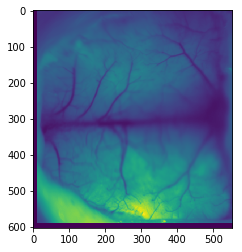

In [7]:
CD.align_planes(use_culled_cells=False, do_debug=True)

In [8]:
manual_keypoints = (np.array([[500, 530], [400, 520], [300, 510], [200, 450], [100, 415]]), #[topy, topx]
                    np.array([[500, 95], [400, 115], [300, 150], [200, 170], [100, 230]]))
# manual_keypoints = None


In [9]:
CD.merge_planes(do_debug=False, do_plots=True, manual_keypoints=manual_keypoints)

{'top_focus': array([  0. ,  55.3, 110.6, 165.9, 221.2, 276.5, 331.8, 387.1, 442.4,
       497.7]), 'bot_focus': array([  0. ,  55.3, 110.6, 165.9, 221.2, 276.5, 331.8, 387.1, 442.4,
       497.7])}
Using manual keypoints


/home/user/anaconda3/envs/cosmostools3_2/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


/home/user/anaconda3/envs/cosmostools3_2/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


/home/user/anaconda3/envs/cosmostools3_2/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


/home/user/anaconda3/envs/cosmostools3_2/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


/home/user/anaconda3/envs/cosmostools3_2/lib/python3.6/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


In [10]:
CD.save_merged()

Saved to: /hdd1/Data/processedData/20180328/cux2ai148m943_for_testing_cosmostools3/20180328-cux2ai148m943_for_testing_cosmostools3-merged_traces_unculled.h5


'/hdd1/Data/processedData/20180328/cux2ai148m943_for_testing_cosmostools3/20180328-cux2ai148m943_for_testing_cosmostools3-merged_traces_unculled.h5'

False


/home/user/anaconda3/envs/cosmostools3_2/lib/python3.6/site-packages/past/utils/__init__.py:95: RuntimeWarning: invalid value encountered in true_divide
  return a / b


Saving to /home/user/Dropbox/cosmos/trace_analysis/20180328/cux2ai148m943_for_testing_cosmostools3/contours_postmerge.pdf
---Plotting contours: 19.991180419921875 seconds ---


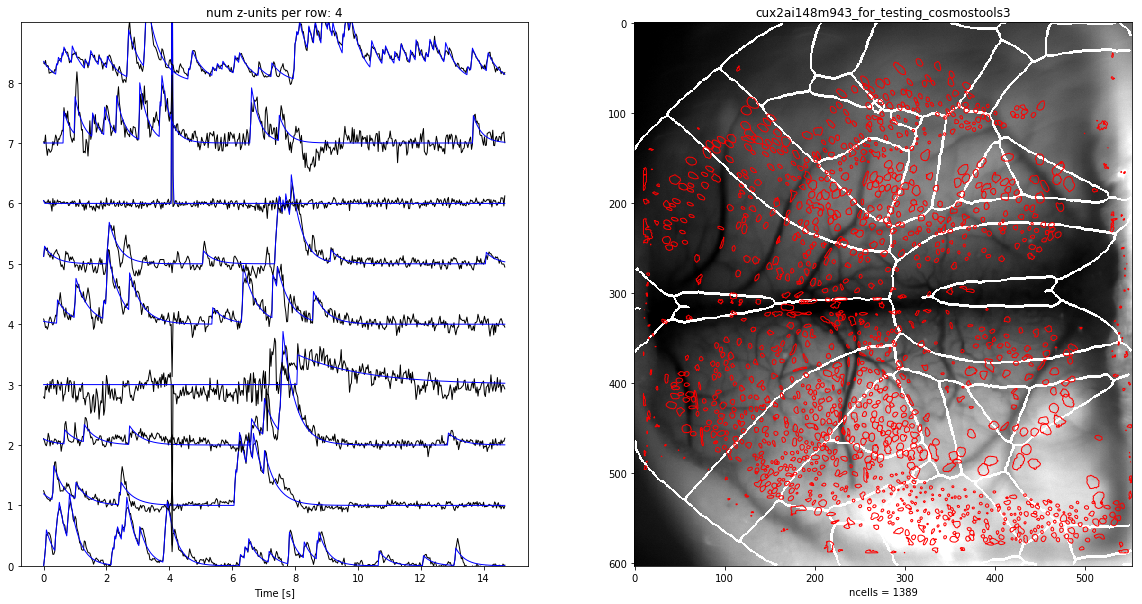

In [11]:
CD.plot_cells_postmerge(np.arange(1, 10), n_timepoints=500, do_events=True,
                        do_atlas_overlay=True, highlight_neurons=False, do_seconds=True)

In [4]:
### MANUALLY MERGE HERE.
CD.cull_postmerge(do_load=True, do_auto=False, do_manual=True, which_key=None, nt=4e3, only_show_non_culled=True)

Only non-previously culled: True


Loading BokehJS ...

Initializing CellSorter class.


Text(value='', description='[k]eep/[d]elete/[s]ave/[b]ack? ', placeholder='[k]eep, [d]elete, [s]ave, [b]ack')

IntSlider(value=0, description='Frame', max=1367)

Saved to: /hdd1/Data/processedData/20180328/cux2ai148m943_for_testing_cosmostools3/keep_cells_merged.npz


In [5]:
CD.save_cull_postmerge()

Saved to: /hdd1/Data/processedData/20180328/cux2ai148m943_for_testing_cosmostools3/20180328-cux2ai148m943_for_testing_cosmostools3-merged_traces.h5


'/hdd1/Data/processedData/20180328/cux2ai148m943_for_testing_cosmostools3/20180328-cux2ai148m943_for_testing_cosmostools3-merged_traces.h5'

In [6]:
CD.plot_cells_postmerge(np.arange(0, 25), n_timepoints=2000, do_events=True,
                        do_atlas_overlay=True, highlight_neurons=True,do_seconds=True,
                        load_culled=True)

False


/home/user/anaconda3/envs/cosmostools3_7/lib/python3.6/site-packages/past/utils/__init__.py:95: RuntimeWarning: invalid value encountered in true_divide
  return a / b


Saving to /home/user/Dropbox/cosmos/trace_analysis/20180328/cux2ai148m943_for_testing_cosmostools3/contours_postmerge.pdf
---Plotting contours: 18.716942310333252 seconds ---


After you have completed this, copy the merged_traces.h5 file from processedData to Dropbox/cosmos_data/date/...
Then, add the relevant info to cosmos.params.trace_analyze_params.py

## End of useful code 

In [ ]:
# Just to test atlas overlay...
import cosmos.imaging.atlas_registration as reg
overlay = reg.overlay_atlas_outline(CD.atlas_info['aligned_atlas_outline'],
                                    CD.atlas_info['img'])
plt.imshow(overlay)

In [ ]:
# For testing the loading...
"""
self = CD
h5_path = os.path.join(self.base_path, self.date, self.name,
        self.date + '-' + self.name + 
        '-merged_traces_unculled.h5')

import h5py
with h5py.File(h5_path, "r") as hf:
    footprints = np.array(hf['footprints'])
    cm = np.array(hf['cm'])
    areas = np.array(hf['areas'])
    tseries = np.array(hf['tseries'])
    tseries_raw = np.array(hf['tseries_raw'])
    spikes = np.array(hf['spikes'])
    mean_frames = np.array(hf['mean_frames'])
    corr_frames = np.array(hf['corr_frames'])
    focus_id = np.array(hf['focus_id'])
    date = str(np.array(hf['date']))
    name = str(np.array(hf['name']))
    led_frames = np.array(hf['led_frames'])

    if 'atlas_info' in hf.keys():
        atlas_info = hf['atlas_info']
        aligned_atlas_outline = np.array(atlas_info['aligned_atlas_outline'])
        atlas = np.array(atlas_info['atlas'])
        atlas_coords = np.array(atlas_info['atlas_coords'])
        img_coords = np.array(atlas_info['coords'])
        img = np.array(atlas_info['img'])
        
    print(footprints.shape)
    print(cm.shape)
    print(areas.shape)
    print(tseries.shape)
    print(tseries_raw.shape)
    print(spikes.shape)
    print(mean_frames.shape)
    print(corr_frames.shape)
    print(focus_id.shape)
    print(date)
    print(name)
    print(led_frames.shape)
    print(aligned_atlas_outline.shape)
    print(atlas.shape)
    print(atlas_coords.shape)
    print(img_coords.shape)
    print(img.shape)
    print(img_coords)
    print(atlas_coords)
"""

In [ ]:
"""
self = CD
h5_path = os.path.join(self.base_path, self.date, self.name,
        self.date + '-' + self.name + 
        '-merged_traces.h5')

import h5py
with h5py.File(h5_path, "r") as hf:
    footprints = np.array(hf['footprints'])
    cm = np.array(hf['cm'])
    areas = np.array(hf['areas'])
    tseries = np.array(hf['tseries'])
    tseries_raw = np.array(hf['tseries_raw'])
    spikes = np.array(hf['spikes'])
    mean_frames = np.array(hf['mean_frames'])
    corr_frames = np.array(hf['corr_frames'])
    focus_id = np.array(hf['focus_id'])
    date = str(np.array(hf['date']))
    name = str(np.array(hf['name']))
    led_frames = np.array(hf['led_frames'])

    if 'atlas_info' in hf.keys():
        atlas_info = hf['atlas_info']
        aligned_atlas_outline = np.array(atlas_info['aligned_atlas_outline'])
        atlas = np.array(atlas_info['atlas'])
        atlas_coords = np.array(atlas_info['atlas_coords'])
        img_coords = np.array(atlas_info['coords'])
        img = np.array(atlas_info['img'])
        
    print(footprints.shape)
    print(cm.shape)
    print(areas.shape)
    print(tseries.shape)
    print(tseries_raw.shape)
    print(spikes.shape)
    print(mean_frames.shape)
    print(corr_frames.shape)
    print(focus_id.shape)
    print(date)
    print(name)
    print(led_frames.shape)
    print(aligned_atlas_outline.shape)
    print(atlas.shape)
    print(atlas_coords.shape)
    print(img_coords.shape)
    print(img.shape)
    print(img_coords)
    print(atlas_coords)
"""

## Legacy code

In [ ]:
#### TODO: Turn this into a test case?
### Plot the results of the alignment.

doPlotOrig = False
doPlotAligned = False
doPlotCM = False

if doPlotOrig:
    plt.figure(figsize=(10,10))
    plt.subplot(121)
    plt.imshow(all_mean_frames[0][0])
    plt.subplot(122)
    plt.imshow(all_mean_frames[0][1])

if doPlotAligned:
    plt.figure(figsize=(20,20))
    imgs = utils.crop_images(frames[0], aligned_frame)
    plt.subplot(121)
    plt.imshow(imgs[0], clim=[0, 40000])
    plt.plot(keypoints[0][:,0], keypoints[0][:,1], 'co')
    plt.plot(aligned_keypoints[0][:,0], aligned_keypoints[0][:,1], 'mo')
    if doPlotCM:
        cm = all_cm[0][0]
        plt.plot(cm[:,1], cm[:,0], 'go')
        cm_unaligned = all_cm_unaligned[0][0]
        plt.plot(cm_unaligned[:,1], cm_unaligned[:,0], 'yo', alpha=0.8)
    
    plt.subplot(122)
    plt.imshow(imgs[1], clim=[0, 40000])
    plt.plot(keypoints[1][:,0], keypoints[1][:,1], 'co')
    plt.plot(aligned_keypoints[1][:,0], aligned_keypoints[1][:,1], 'mo')
    if doPlotCM:
        cm = all_cm[0][1]
        area = all_areas[0][1]
        plt.plot(cm[:,1], cm[:,0], 'ro', alpha=0.7)
#         plt.scatter(cm[:,1], cm[:,0], area/30.0, 'g', alpha=1)
        cm_unaligned = all_cm_unaligned[0][1]
        plt.plot(cm_unaligned[:,1], cm_unaligned[:,0], 'bo', alpha=0.7)

